In [2]:
# imports
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Table of contents
* [Introduction](#introduction)
* [Part 1](#part1)
    * [ESG search volumes](#esg_sv)
    * [Company search volumes](#c_sv)
    * [Stocks](#stocks)
        * [Correlations](#md_corr)
    * [Market Data](#mkt_data)
        * [Correlations](#md_corr)
    * [ESG ratings](#esg_r)
* [Part 2](#part2)
    * [ESG search volumes](#esg_sv_df)
    * [Company search volumes](#c_sv_df)
    * [Stocks](#stocks_df)
    * [Market Data](#mkt_data_df)
        * [Volume](#vol_df)
        * [Quoted spread](#qs_df)
        * [Market capitalization](#mc_df)
    * [ESG ratings](#esg_r_df)
    * [VIX](#vix_df)

# Introduction

In the first part of this notebook we will look at the collected data and run some descriptive statistics. In the second part, we will manipulate the dataframes in order to format them in the correct way to carry out panel regression.

In [3]:
# loading dataframes
esg_search = pd.read_csv('Data/ESG_trends.csv', index_col = 0)
companies_search = pd.read_csv('Data/companies_trends.csv', index_col = 'Week')
stocks = pd.read_csv('Data/Stocks.csv', header = [0,1], index_col = 0)
esg_ratings = pd.read_csv('Data/ESG_final.csv', index_col = 0)
market_data = pd.read_csv('Data/Market_data.csv', index_col = 0)
vix_data = pd.read_csv('Data/VIX_History.csv', index_col = 0)

In [9]:
companies_ticker = market_data['Ticker Symbol'].unique()
print(f'Overall we have data on {len(companies_ticker)} US companies.')

Overall we have data on 276 US companies.


# Part 1

# 1.1 ESG search volumes<a name="esg_sv"></a>

Search volumes collected on Google trends about ESG keywords. There are four groups of keywords: ESG, Environment, Social and Governance.

In [5]:
esg_search.head()

,ESG,Environment,Social,Governance
2009-01-01,3.166154,9.227857,3.899167,3.664091
2009-01-02,4.008462,11.831429,8.912083,6.791818
2009-01-03,7.281538,13.157857,5.140000,8.665000
2009-01-04,7.340769,9.617143,10.724583,2.734545
2009-01-05,8.163077,18.562857,8.952917,11.808636


In [6]:
# create a column with month and year to group by
esg_search = esg_search.reset_index(names = 'Date')
esg_search['Y-m'] = esg_search.Date.apply(lambda x: x[:7])
esg_search.Date = esg_search.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())

In [7]:
# create temporary dataframe for plotting, taking the mean search volume by month
temp_plot_esg = esg_search.groupby('Y-m').mean(numeric_only = True)

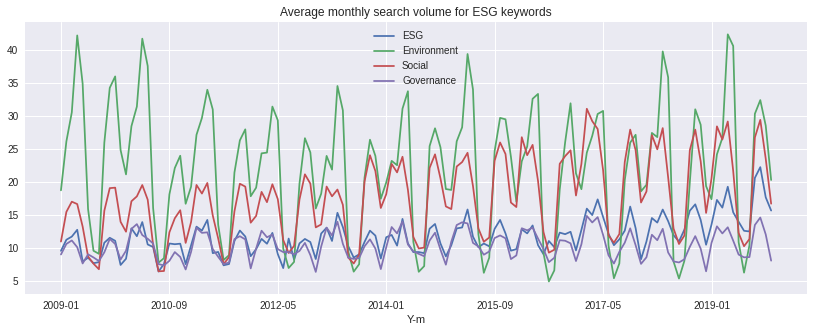

In [13]:
with plt.style.context('seaborn'):
    temp_plot_esg.plot(figsize = (14,5), title = 'Average monthly search volume for ESG keywords')
    plt.legend()
    plt.show()

# 1.2 Companies search volumes<a name="c_sv"></a>

Search volumes collected on Google trends about each company (using the company name as keyword).

In [9]:
companies_search.head()

,MA,TGT,PNC,YUM,LH,NEM,KMX,PXD,GWW,BXP,...,AIG,DGX,WFC,HON,ARE,WMT,TSN,EQT,WEC,CVS
Week,,,,,,,,,,,,,,,,,,,,,
2009-01-04,47.0,32.0,29.0,81.0,68.0,47.0,68.0,1.0,86.0,42.0,...,13.0,89.0,44.0,100.0,1.0,24.0,70.0,1.0,63.0,47.0
2009-01-11,45.0,29.0,29.0,56.0,65.0,51.0,67.0,1.0,93.0,15.0,...,12.0,85.0,45.0,92.0,1.0,22.0,44.0,1.0,63.0,48.0
2009-01-18,44.0,28.0,28.0,83.0,72.0,43.0,71.0,96.0,83.0,24.0,...,11.0,85.0,41.0,82.0,32.0,22.0,42.0,1.0,62.0,47.0
2009-01-25,42.0,28.0,27.0,77.0,60.0,47.0,66.0,37.0,83.0,67.0,...,12.0,72.0,39.0,99.0,1.0,22.0,63.0,1.0,71.0,44.0
2009-02-01,45.0,28.0,27.0,98.0,56.0,63.0,69.0,44.0,85.0,28.0,...,11.0,76.0,42.0,94.0,57.0,22.0,53.0,88.0,92.0,47.0


In [10]:
# create a column with month and year to group by
companies_search = companies_search.reset_index(names = 'Date')
companies_search['Y-m'] = companies_search.Date.apply(lambda x: x[:7])

# format date column as datetim
companies_search.Date = companies_search.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())

In [11]:
# create temporary dataframe for plotting, taking the mean search volume by month
temp_plot_comp = companies_search.groupby('Y-m').mean(numeric_only = True)

In [12]:
# find the companies with the highest and lowest search volumes over the years
top_10_comp = temp_plot_comp.mean().sort_values()[-10:].index
bottom_10_comp = temp_plot_comp.mean().sort_values()[:10].index

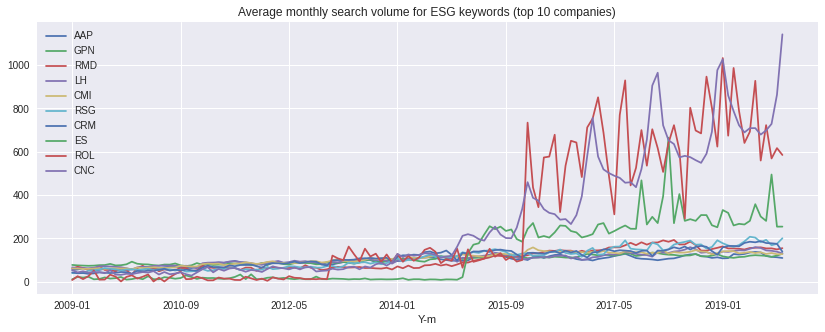

In [14]:
with plt.style.context('seaborn'):
    temp_plot_comp[list(top_10_comp)].plot(figsize = (14,5), 
                                    title = 'Average monthly search volume for ESG keywords (top 10 companies)')
    plt.legend()
    plt.show()

# 1.3 Stocks<a name="stocks"></a>

In [34]:
ind = list(zip(['Adj Close']*len(companies_ticker), companies_ticker))
stock_daily = stocks[ind]['Adj Close']
stock_daily.head()

,PH,CPT,NEE,KR,MTD,USB,BK,T,BWA,CAG,...,NEM,LVS,VMC,STZ,NVR,TDG,TJX,DLR,EXR,PXD
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02 00:00:00,34.973591,17.074366,8.530401,10.317751,67.820000,17.965996,21.065912,7.655221,9.989973,8.472915,...,30.985123,4.728462,60.018173,14.886580,450.940002,14.214288,4.475555,17.985174,6.341025,15.320856
2009-01-05 00:00:00,35.112995,16.850992,8.576634,10.368294,67.470001,17.083708,20.482388,7.397620,10.438128,8.382133,...,29.824997,5.655479,60.198895,14.931826,478.989990,14.872948,4.442325,17.423502,6.066412,16.500692
2009-01-06 00:00:00,35.515690,17.544052,8.456096,9.859013,69.699997,16.898706,20.452835,7.363792,10.890638,8.467871,...,30.385857,5.602126,57.720387,15.266664,493.130005,14.979186,4.508783,18.311869,6.484570,17.043926
2009-01-07 00:00:00,33.324032,17.498224,8.363627,9.948429,68.330002,16.628328,19.780682,7.218632,10.290196,8.442654,...,26.974640,4.935206,55.078331,14.008767,484.309998,14.507499,4.508783,18.117004,6.278612,16.517668
2009-01-08 00:00:00,33.455696,17.418041,8.437932,9.769598,67.099998,16.478910,19.485233,7.210675,10.172716,8.467871,...,29.002935,4.828500,54.217731,13.619637,496.359985,14.732718,4.463094,18.277479,6.160029,16.899628


In [220]:
# change Date column to datetime
stock_daily = stock_daily.reset_index(names = 'Date')
stock_daily['Y-m'] = stock_daily.Date.apply(lambda x: x[:7])
stock_daily['Date'] = stock_daily.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
stock_daily = stock_daily.set_index('Date')

In [36]:
top_10_stock = stock_daily.mean(numeric_only = True).sort_values()[-10:].index
bottom_10_stock = stock_daily.mean(numeric_only = True).sort_values()[:10].index

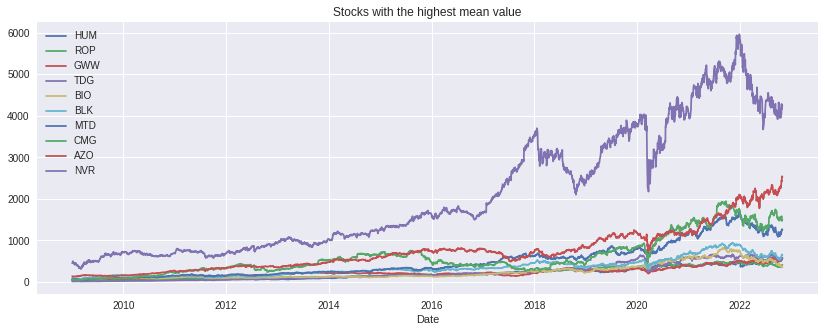

In [221]:
stock_daily
with plt.style.context('seaborn'):
    stock_daily[list(top_10_stock)].plot(figsize = (14,5), title=('Stocks with the highest mean value'))
    plt.legend()
    plt.show()

## 1.3.1 Correlations<a name="st_corr"></a>

### Companies search volumes and stocks<a name="sv_st"></a>

In [210]:
# merge stock data and search data
df_corr1 = pd.merge(companies_search, stock_daily, left_on= 'Y-m', right_on= 'Y-m', suffixes=('_search', '_stock'))
df_corr1 = df_corr1.set_index('Date_search')

# compute correlation between stock and searches for all companies
corre1 = {}
for i in companies_ticker:
    corre1[i] = df_corr1[i+'_search'].corr(df_corr1[i+'_stock'])

In [211]:
# create correlation dataframe
correlations1 = pd.DataFrame(pd.Series(corre1))
correlations1 = correlations1.rename(columns = {0:'Correlation'})
correlations1 = correlations1.sort_values('Correlation')
correlations1

,Correlation
PRU,-0.847540
BAC,-0.823187
HIG,-0.820909
KMB,-0.818353
AVY,-0.816038
...,...
RSG,0.880917
CNC,0.889805
LH,0.904151
EXR,0.906551


In [212]:
# find companies with highest correlations (positive and negative)
top_10_corr = correlations1[-10:]
bottom_10_corr = correlations1[:10]

In [213]:
def normalize(data):
    return (data - min(data))/(max(data) - min(data))

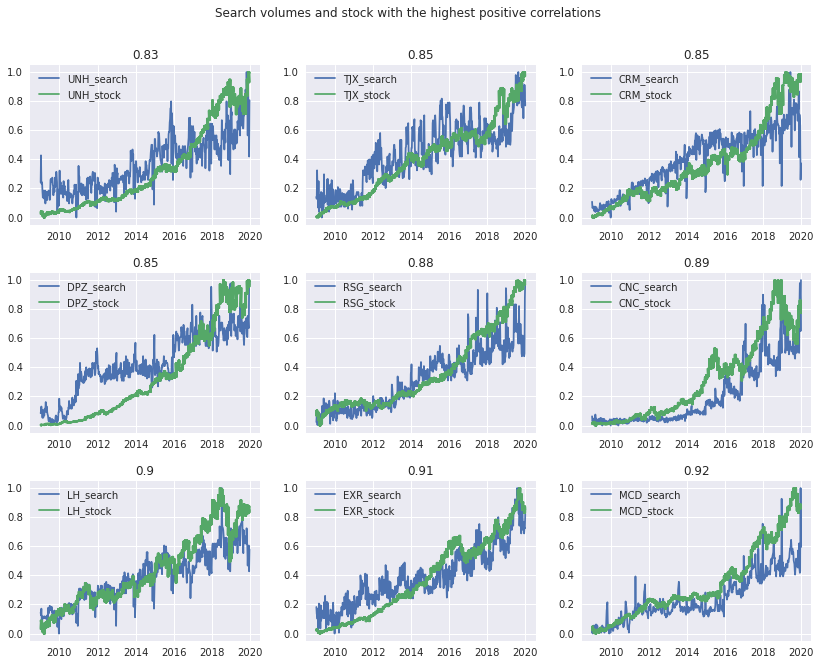

In [214]:
# Top 10 correlated
with plt.style.context('seaborn'):
    plt.subplots(3,3, figsize= (14,10))
    for i,x in enumerate(top_10_corr.index[1:10]):
        plt.subplot(3,3, i+1)
        normalize(df_corr1[x+'_search']).plot()
        normalize(df_corr1[x+'_stock']).plot()
        plt.title(np.round(correlations1.loc[x][0],2))
        plt.xlabel('')
        plt.legend()
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)
    plt.suptitle('Search volumes and stock with the highest positive correlations')

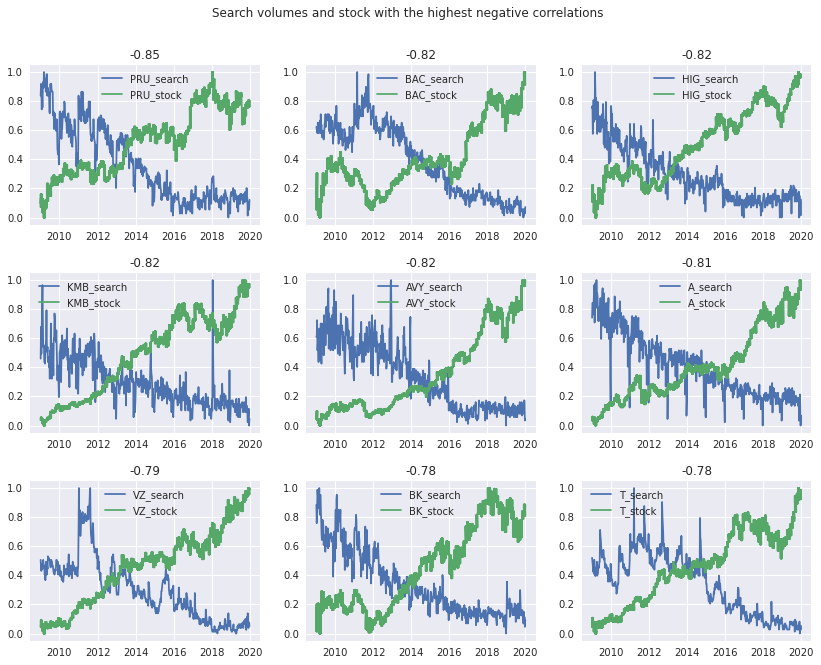

In [215]:
# Bottom 10 correlated
with plt.style.context('seaborn'):
    plt.subplots(3,3, figsize= (14,10))
    for i,x in enumerate(bottom_10_corr.index[:9]):
        plt.subplot(3,3, i+1)
        normalize(df_corr1[x+'_search']).plot()
        normalize(df_corr1[x+'_stock']).plot()
        plt.title(np.round(correlations1.loc[x][0],2))
        plt.xlabel('')
        plt.legend()
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)
    plt.suptitle('Search volumes and stock with the highest negative correlations')

# 1.4 Market data<a name="mkt_data"></a>

In [68]:
market_data.head()

,Ticker Symbol,Date,Ask Price,Bid Price,Midpoint,Quoted Spread,Company Market Capitalization
0,PH,2009-01-02,46.43,44.63,45.530,0.039534,7.255711e+09
1,PH,2009-01-05,45.64,45.03,45.335,0.013455,7.284631e+09
2,PH,2009-01-06,46.26,45.34,45.800,0.020087,7.368178e+09
3,PH,2009-01-07,43.27,42.56,42.915,0.016544,6.913491e+09
4,PH,2009-01-08,43.13,42.44,42.785,0.016127,6.940805e+09


In [66]:
# changing date format
market_data['Date'] = market_data['Date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').date())

In [67]:
# removing duplicates
m_data_temp = market_data.drop_duplicates(['Ticker Symbol','Date'])

# pivoting to obtain each company as a colum
m_data_temp = m_data_temp.pivot(index='Date', columns='Ticker Symbol')
m_data_temp

Ask Price                                                  \
Ticker Symbol          A     AAP     ABC        ABT    ADM    AEE    AES   
Date                                                                       
2009-01-02     11.848992   34.30  18.245  25.650938  29.24  34.18   9.09   
2009-01-05     12.199384   33.90  18.595  25.182034  29.30  34.34   9.29   
2009-01-06     13.128997   33.73  18.195  24.488248  28.44  33.53   9.58   
2009-01-07     13.157601   32.68  18.000  24.373415  28.53  33.13   9.33   
2009-01-08     13.343523   32.76  18.610  24.531311  28.21  33.18   9.51   
...                  ...     ...     ...        ...    ...    ...    ...   
2019-12-24     85.330000  160.60  85.410  87.300000  46.09  75.78  19.77   
2019-12-26     85.480000  159.31  85.060  87.280000  46.21  75.65  19.94   
2019-12-27     85.420000  158.36  84.930  87.400000  46.31  76.28  19.99   
2019-12-30     84.920000  159.20  83.650  86.820000  46.13  76.57  20.05   
2019-12-31     85.310000  160.15  85.010  86.860000  46.35  76.80  19.90   

                                          ... Company Market Capitalization  \
Ticker Symbol     AFL        AIG     AIZ  ...                           WHR   
Date                                      ...                                 
2009-01-02     23.105  28.149744   30.26  ...                  3.184260e+09   
2009-01-05     23.055  27.982186   30.06  ...                  3.391580e+09   
2009-01-06     23.045  28.987534   31.18  ...                  3.561670e+09   
2009-01-07     22.170  27.814628   30.39  ...                  3.285000e+09   
2009-01-08     22.840  27.647070   30.99  ...                  3.381360e+09   
...               ...        ...     ...  ...                           ...   
2019-12-24     52.770  50.960000  129.09  ...                  9.175343e+09   
2019-12-26     52.630  50.620000  129.09  ...                  9.175975e+09   
2019-12-27     52.620  51.070000  129.66  ...                  9.222111e+09   
2019-12-30     52.750  51.010000  130.80  ...                  9.241071e+09   
2019-12-31     52.900  51.330000  131.05  ...                  9.323863e+09   

                                                                       \
Ticker Symbol            WM           WMB           WMT           WRB   
Date                                                                    
2009-01-02     1.657585e+10  7.201352e+09  2.242915e+11  4.386553e+09   
2009-01-05     1.647280e+10  7.376304e+09  2.217027e+11  4.392290e+09   
2009-01-06     1.623236e+10  7.712020e+09  2.197414e+11  4.145565e+09   
2009-01-07     1.598210e+10  7.503970e+09  2.178586e+11  3.993513e+09   
2009-01-08     1.628143e+10  7.622180e+09  2.015407e+11  4.136958e+09   
...                     ...           ...           ...           ...   
2019-12-24     4.776956e+10  2.889524e+10  3.390708e+11  1.222767e+10   
2019-12-26     4.801562e+10  2.885888e+10  3.390991e+11  1.223660e+10   
2019-12-27     4.831683e+10  2.859223e+10  3.392978e+11  1.225447e+10   
2019-12-30     4.826592e+10  2.811953e+10  3.387587e+11  1.226520e+10   
2019-12-31     4.834653e+10  2.874980e+10  3.371699e+11  1.234919e+10   

                                                                       \
Ticker Symbol           WST            WY           XOM           YUM   
Date                                                                    
2009-01-02     1.246805e+09  5.795685e+09  4.062406e+11  1.056147e+10   
2009-01-05     1.213435e+09  5.802955e+09  4.061909e+11  1.084860e+10   
2009-01-06     1.186608e+09  5.821129e+09  3.995728e+11  1.082880e+10   
2009-01-07     1.135898e+09  5.681189e+09  3.893720e+11  1.044265e+10   
2009-01-08     1.150948e+09  5.815677e+09  3.935518e+11  1.039314e+10   
...                     ...           ...           ...           ...   
2019-12-24     1.115261e+10  2.117318e+10  2.962620e+11  3.034603e+10   
2019-12-26     1.115557e+10  2.127248e+10  2.967275e+11  3.078762e+10   
2019-12-27     1.

## 1.4.1 Correlations<a name="md_corr"></a>

### Market capitalization and stocks<a name="mc_st"></a>

In [91]:
# only selecting market capitalization info
market_cap = m_data_temp['Company Market Capitalization']
market_cap.head()

Ticker Symbol,A,AAP,ABC,ABT,ADM,AEE,AES,AFL,AIG,AIZ,...,WHR,WM,WMB,WMT,WRB,WST,WY,XOM,YUM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,4.087681e+09,3.232760e+09,5.481987e+09,3.976242e+10,1.872463e+10,7.243676e+09,5.721625e+09,2.159494e+10,3.808590e+09,3.556737e+09,...,3.184260e+09,1.657585e+10,7.201352e+09,2.242915e+11,4.386553e+09,1.246805e+09,5.795685e+09,4.062406e+11,1.056147e+10,9.097877e+09
2009-01-05,4.226119e+09,3.189202e+09,5.586787e+09,3.907942e+10,1.865407e+10,7.228815e+09,6.046115e+09,2.130564e+10,3.740982e+09,3.501457e+09,...,3.391580e+09,1.647280e+10,7.376304e+09,2.217027e+11,4.392290e+09,1.213435e+09,5.802955e+09,4.061909e+11,1.084860e+10,8.910516e+09
2009-01-06,4.563403e+09,3.193937e+09,5.565211e+09,3.780251e+10,1.814731e+10,7.071713e+09,6.218294e+09,2.130097e+10,3.921270e+09,3.644950e+09,...,3.561670e+09,1.623236e+10,7.712020e+09,2.197414e+11,4.145565e+09,1.186608e+09,5.821129e+09,3.995728e+11,1.082880e+10,9.076091e+09
2009-01-07,4.588573e+09,3.067050e+09,5.534387e+09,3.759464e+10,1.817938e+10,6.954948e+09,5.979893e+09,2.054972e+10,3.695910e+09,3.517923e+09,...,3.285000e+09,1.598210e+10,7.503970e+09,2.178586e+11,3.993513e+09,1.135898e+09,5.681189e+09,3.893720e+11,1.044265e+10,8.781978e+09
2009-01-08,4.618777e+09,3.077467e+09,5.659223e+09,3.801038e+10,1.780733e+10,6.971932e+09,6.138827e+09,2.105833e+10,3.718446e+09,3.623779e+09,...,3.381360e+09,1.628143e+10,7.622180e+09,2.015407e+11,4.136958e+09,1.150948e+09,5.815677e+09,3.935518e+11,1.039314e+10,9.017268e+09


In [196]:
# merge mrkt cap and stock info to compute correlation
df_corr2 = pd.merge(stock_daily, market_cap, left_on = 'Date', right_on = 'Date', suffixes=('_stock', '_mcap'))
df_corr2 = df_corr2.set_index('Date')

# compute correlation between stock and market capitalization for all companies
corre2 = {}
for i in companies_ticker:
    corre2[i] = df_corr2[i+'_stock'].corr(df_corr2[i+'_mcap'])

In [197]:
correlations2 = pd.DataFrame(pd.Series(corre2))
correlations2 = correlations2.rename(columns = {0:'Correlation'})
correlations2 = correlations2.sort_values('Correlation')
correlations2

,Correlation
BKR,0.245927
GLW,0.377974
XOM,0.405515
IBM,0.498841
L,0.637318
...,...
NEE,0.999775
MHK,0.999820
WST,0.999932
COO,0.999936


In [198]:
# find companies with the highest and lowest correlations
top_10_corr2 = correlations2[-10:]
bottom_10_corr2 = correlations2[:10]

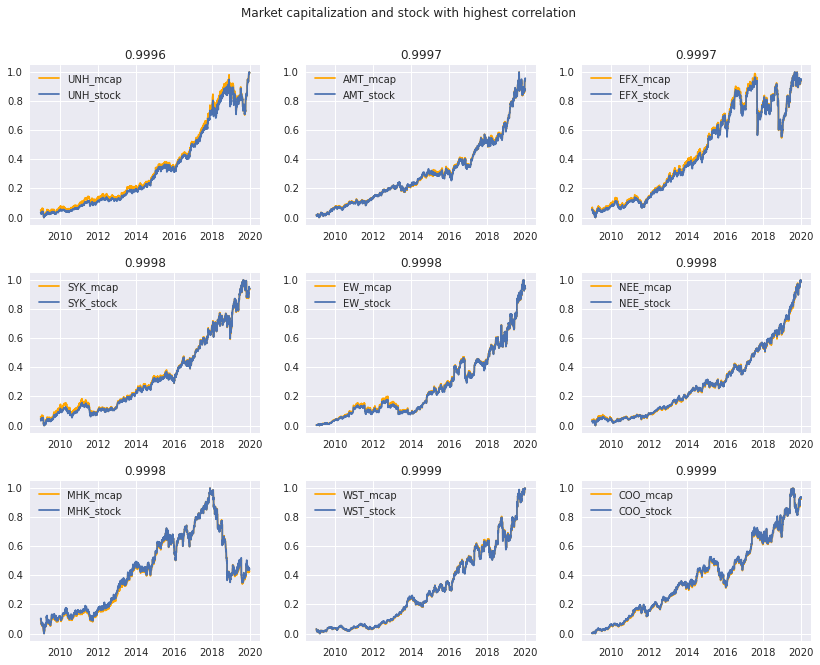

In [224]:
# Top 10 correlated
with plt.style.context('seaborn'):
    plt.subplots(3,3, figsize= (14,10))
    for i,x in enumerate(top_10_corr2.index[0:9]):
        plt.subplot(3,3, i+1)
        normalize(df_corr2[x+'_mcap']).plot(color = 'orange')
        normalize(df_corr2[x+'_stock']).plot()
        plt.title(np.round(correlations2.loc[x][0],4))
        plt.xlabel('')
        plt.legend()
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)
    plt.suptitle('Market capitalization and stock with highest correlation')    

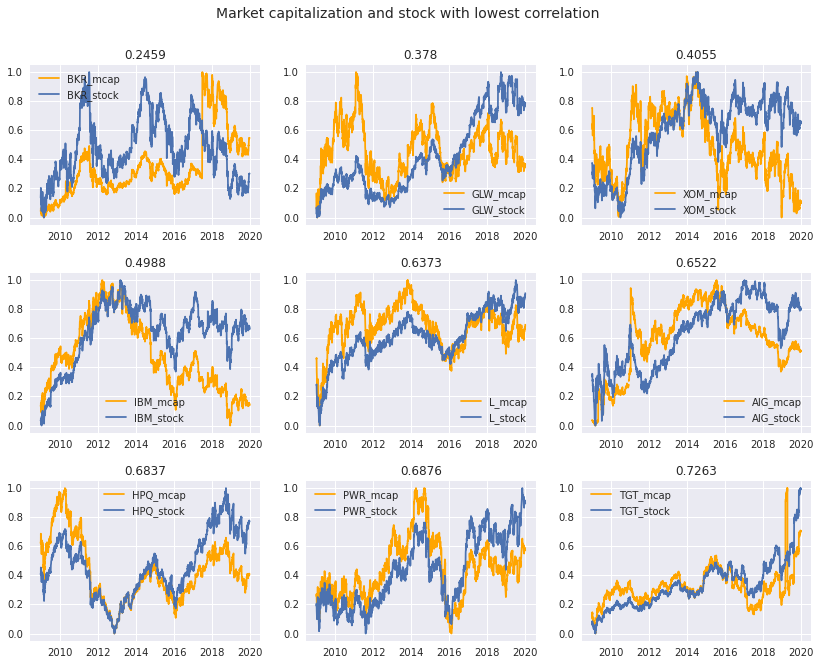

In [201]:
# Bottom 10 correlated
with plt.style.context('seaborn'):
    plt.subplots(3,3, figsize= (14,10))
    for i,x in enumerate(bottom_10_corr2.index[0:9]):
        plt.subplot(3,3, i+1)
        normalize(df_corr2[x+'_mcap']).plot(color = 'orange')
        normalize(df_corr2[x+'_stock']).plot()
        plt.title(np.round(correlations2.loc[x][0],4))
        plt.xlabel('')
        plt.legend()
       
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)
    plt.suptitle('Market capitalization and stock with lowest correlation', size = 14)

### Quoted spread and stocks<a name="qs_st"></a>

In [92]:
quoted_s = m_data_temp['Quoted Spread']
quoted_s.head()

Ticker Symbol,A,AAP,ABC,ABT,ADM,AEE,AES,AFL,AIG,AIZ,...,WHR,WM,WMB,WMT,WRB,WST,WY,XOM,YUM,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-02,0.036252,0.014093,0.034002,0.001307,0.004112,0.009997,0.076528,0.004990,0.005970,0.008629,...,0.037487,0.004738,0.070968,0.005959,0.032341,0.015267,0.010991,0.000614,0.010970,0.011275
2009-01-05,0.030348,0.015757,0.015991,0.001712,0.015477,0.008481,0.041758,0.019932,0.006006,0.017450,...,0.037132,0.014616,0.015888,0.006033,0.017351,0.028521,0.016923,0.001224,0.014292,0.008277
2009-01-06,0.012606,0.008037,0.015508,0.008437,0.005995,0.015327,0.038298,0.020605,0.005797,0.016492,...,0.006940,0.015424,0.014590,0.002141,0.017235,0.016575,0.016849,0.001616,0.015542,0.015139
2009-01-07,0.026990,0.018530,0.012297,0.006697,0.015898,0.018891,0.032680,0.018436,0.006042,0.026000,...,0.038233,0.004308,0.015009,0.001080,0.021544,0.010114,0.025674,0.000766,0.022138,0.021271
2009-01-08,0.033233,0.007968,0.021727,0.004888,0.020412,0.025023,0.052887,0.022805,0.006079,0.013645,...,0.022249,0.018393,0.037853,0.000389,0.086519,0.012302,0.014750,0.000758,0.011465,0.016925


In [202]:
# merge quoted spread and stock info to compute correlation
df_corr3 = pd.merge(stock_daily, quoted_s, left_on = 'Date', right_on = 'Date', suffixes=('_stock', '_quo'))
df_corr3 = df_corr3.set_index('Date')

# compute correlation between stock and quoted spread for all companies
corre3 = {}
for i in companies_ticker:
    corre3[i] = df_corr3[i+'_stock'].corr(df_corr3[i+'_quo'])

In [203]:
correlations3 = pd.DataFrame(pd.Series(corre3))
correlations3 = correlations3.rename(columns = {0:'Correlation'})
correlations3 = correlations3.sort_values('Correlation')
correlations3

,Correlation
GIS,-0.664826
CL,-0.653611
HWM,-0.641524
DUK,-0.624094
K,-0.622578
...,...
KO,-0.030065
FCX,0.018081
MOS,0.308318
DVN,0.330986


In [204]:
# find companies with the highest and lowest correlations
top_10_corr3 = correlations3[-10:]
bottom_10_corr3 = correlations3[:10]

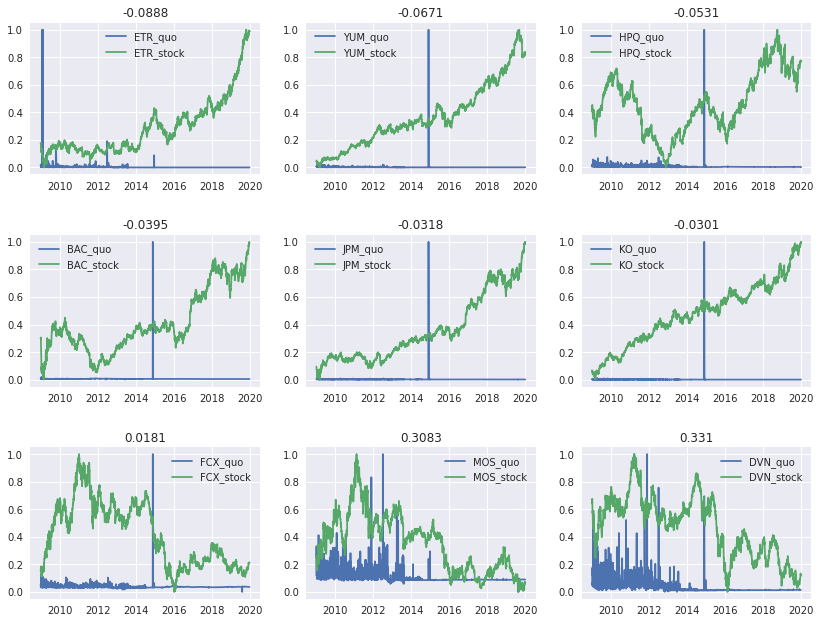

In [207]:
# Top 10 correlated
with plt.style.context('seaborn'):
    plt.subplots(3,3, figsize= (14,10))
    for i,x in enumerate(top_10_corr3.index[0:9]):
        plt.subplot(3,3, i+1)
        normalize(df_corr3[x+'_quo']).plot()
        normalize(df_corr3[x+'_stock']).plot()
        plt.title(np.round(correlations3.loc[x][0],4))
        plt.xlabel('')
        plt.legend()
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

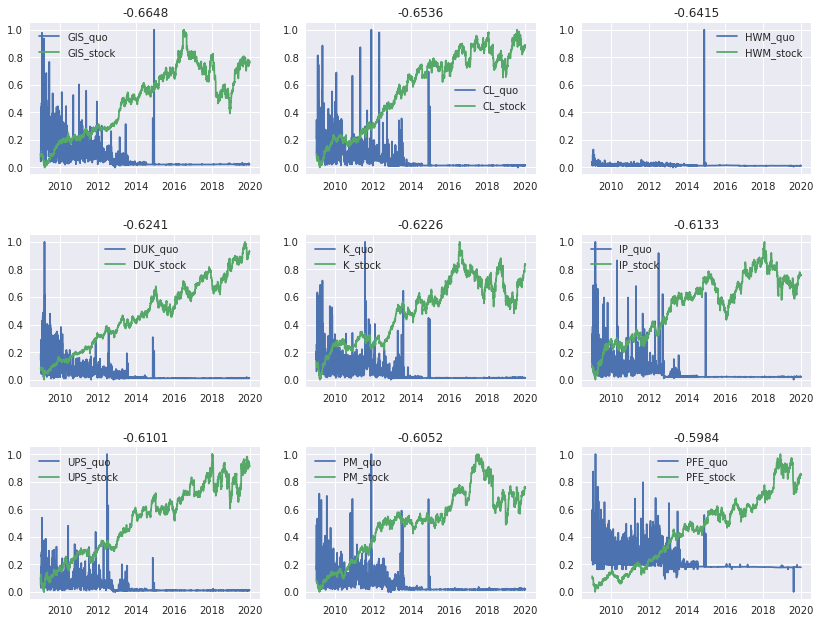

In [226]:
# Bottom 10 correlated
with plt.style.context('seaborn'):
    plt.subplots(3,3, figsize= (14,10))
    for i,x in enumerate(bottom_10_corr3.index[0:9]):
        plt.subplot(3,3, i+1)
        normalize(df_corr3[x+'_quo']).plot()
        normalize(df_corr3[x+'_stock']).plot()
#         df_corr3[x+'_quo'].plot()
#         df_corr3[x+'_stock'].plot()
        plt.title(np.round(correlations3.loc[x][0],4))
        plt.xlabel('')
        plt.legend()
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

# 1.5 ESG Ratings<a name="esg_r"></a>

In [101]:
# selecting and renaming columns
esg_ratings_plot = esg_ratings[['Date','Ticker Symbol','ESG Score','Environmental Pillar Score',
                                'Social Pillar Score', 'Governance Pillar Score']]
esg_ratings_plot = esg_ratings_plot.rename(columns = {'Environmental Pillar Score':'E_score',
                                                       'Social Pillar Score': 'S_score', 
                                                        'Governance Pillar Score':'G_score'})
esg_ratings_plot.head()

,Date,Ticker Symbol,ESG Score,E_score,S_score,G_score
0,2020-12-31T00:00:00Z,ECL,76.396235,74.867451,89.474752,56.936266
1,2019-12-31T00:00:00Z,ECL,71.893076,72.852101,84.821631,48.292081
2,2018-12-31T00:00:00Z,ECL,71.100574,70.981378,84.785085,48.123510
3,2017-12-31T00:00:00Z,ECL,67.354841,63.186166,85.466572,44.030179
4,2016-12-31T00:00:00Z,ECL,70.787790,65.554546,87.876433,51.077428


In [102]:
# create a year column to drop duplicate rows
esg_ratings_plot['Year'] = esg_ratings_plot.Date.apply(lambda x: x[:4])
esg_ratings_plot['Remove'] = esg_ratings_plot['Year']+esg_ratings_plot['Ticker Symbol']
esg_ratings_plot = esg_ratings_plot.drop_duplicates('Remove')

In [105]:
# temporary df grouped by year and company
t_plot = esg_ratings_plot.groupby(['Year','Ticker Symbol']).mean(numeric_only = True)

# retrieve list of years
years = t_plot.index.droplevel('Ticker Symbol').unique()

In [104]:
t_plot

ESG Score    E_score    S_score    G_score
Year Ticker Symbol                                            
2009 A              72.790379  77.597194  82.287954  58.042057
     AAP            29.302437   8.711111  35.376623  33.260116
     ABC            38.397875   0.000000  43.851765  49.135929
     ABT            77.165860  55.737667  92.695454  66.718384
     ADM            57.110894  54.220779  55.644726  62.823234
...                       ...        ...        ...        ...
2020 WRB            58.100423  48.793014  58.589641  60.632139
     WY             77.627649  77.251234  79.680360  76.139534
     XOM            66.689197  82.786082  65.960864  44.379294
     YUM            78.148463  88.872591  86.971178  55.262677
     ZBH            62.927355  39.973456  78.784417  52.760711

[3134 rows x 4 columns]

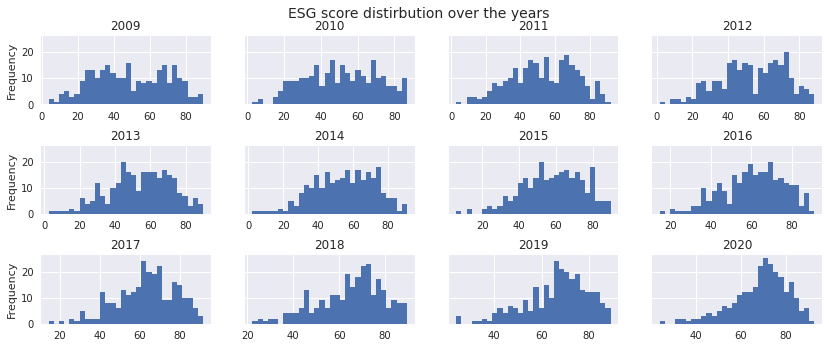

In [185]:
with plt.style.context('seaborn'):
    plt.subplots(3, 4, figsize = (14,5), sharey=True)
    for i, y in enumerate(years):
        plt.subplot(3,4,i+1)
        t_plot.loc[y]['ESG Score'].plot.hist(bins = 30, title = y)
    plt.suptitle('ESG score distirbution over the years', size = 14)
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.6)

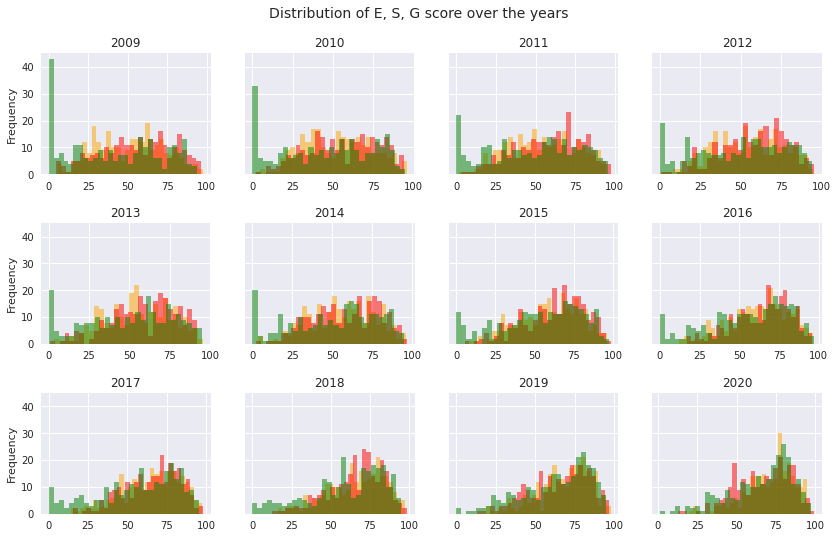

In [177]:
with plt.style.context('seaborn'):
    plt.subplots(3, 4, figsize = (14,8), sharey = True)
    for i, y in enumerate(years):
        plt.subplot(3,4,i+1)
        t_plot.loc[y]['S_score'].plot.hist(bins = 30, title = y, color = 'orange', alpha = 0.5)
        t_plot.loc[y]['G_score'].plot.hist(bins = 30, title = y, color = 'red', alpha = 0.5)
        t_plot.loc[y]['E_score'].plot.hist(bins = 30, title = y, color = 'green', alpha = 0.5)

    plt.suptitle('Distribution of E, S, G score over the years', size = 14)
    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)

In [112]:
# get 10 companies with highest variance in ESG score across years
top_10_var = esg_ratings_plot.groupby('Ticker Symbol').std(numeric_only = True).sort_values('ESG Score', 
                                                                               ascending = False).head(10).index
top_10_var = list(top_10_var)

# df of top 10 variability companies
top_10_var_df = esg_ratings_plot[esg_ratings_plot['Ticker Symbol'].isin(top_10_var)]
top_10_var_df = top_10_var_df.set_index(['Ticker Symbol','Year'])

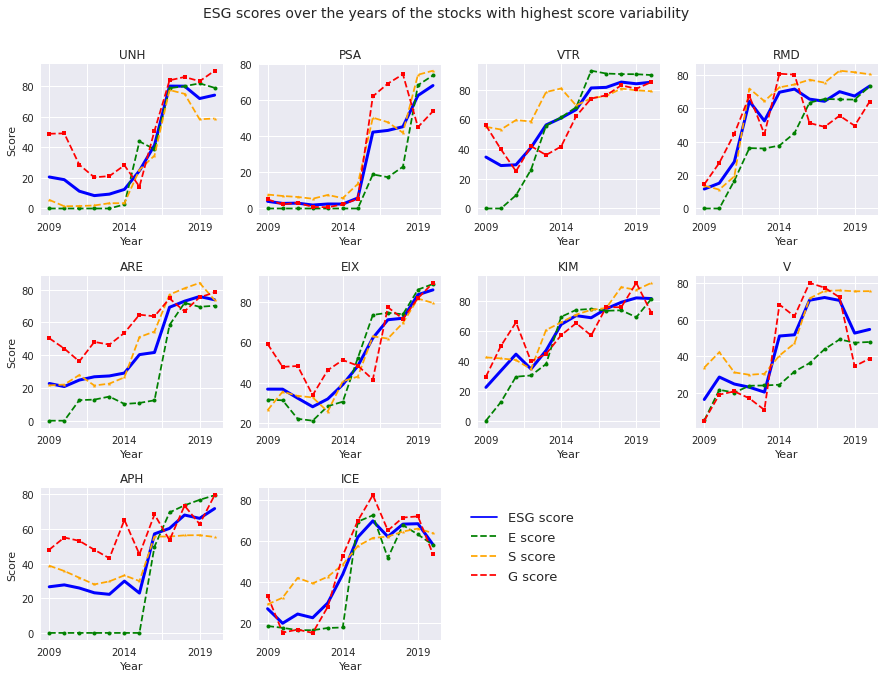

In [178]:
with plt.style.context('seaborn'):
    fig, axes = plt.subplots(3, 4, figsize = (15,10))

    for i, c in enumerate(top_10_var):
        top_10_var_df.loc[c].sort_index()['ESG Score'].plot(ax = axes[i//4][i%4], title = c, color = 'blue', 
                                                            linewidth = 3)
        top_10_var_df.loc[c].sort_index()['E_score'].plot(ax = axes[i//4][i%4], title = c, color = 'green', ls = '--', 
                                                          marker = 'o', markersize = 4)
        top_10_var_df.loc[c].sort_index()['S_score'].plot(ax = axes[i//4][i%4], title = c, color = 'orange', ls = '--',
                                                         marker = '*', markersize = 4)
        top_10_var_df.loc[c].sort_index()['G_score'].plot(ax = axes[i//4][i%4], title = c, color = 'red', ls = '--',
                                                             marker = 's', markersize = 4)
        if i%4 == 0:
            axes[i//4][i%4].set_ylabel('Score')

    c = ['blue','green','orange','red']
    l = ['ESG score', 'E score', 'S score','G score']
    ls = ['-','--','--','--']
    patch = [mlines.Line2D([1],[2], color=c[i], label=l[i], ls = ls[i]) for i in range(4)]
    axes[2][1].legend(handles=patch, loc ='lower left', bbox_to_anchor=(1.1, 0.3),  prop={'size': 13})

    fig.delaxes(axes[2][2])
    fig.delaxes(axes[2][3])

    plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
    plt.suptitle('ESG scores over the years of the stocks with highest score variability', size = 14)

# Part 2 - Preparing dataframes for panel structure

In order to run the panel regressions we need to structure the data properly. In the following section of the notebbok we will go through each of the datasets and format it in the correct way.

Some of the data we have will be detrended: instead of using the simple numeric value, we will compute the abnormal value it takes using the following formula:
$$AbX_t = log(X_t)-log(Median(X_{t-1},X_{t-1},...,X_{t-n}))$$

The value of n depends on the type of data we are considering: it is 365 if we consider daily data, 252 if we consider daily market data and 52 if we consider weekly data.

In [6]:
def detrend(x, offset):
    """
    Function that takes an array of values and returns the detrended array
    """
    new = np.zeros(len(x)-offset)
    for t in range(offset, len(x)):
        lnx = np.log(x[t])
        lnm = np.log(np.median(x[t-offset:t-1]))
        new[t-offset] = lnx-lnm
    return new

In [7]:
def duplicate_column(df, col_name, date_col = 'Date', tickers = None):
    """
    Function to properly structure a dataframe for panel analysis where the values are the same for all companies
    """
    new_df = df[date_col] 
    
    if tickers == None:
        tickers = companies_ticker

    for tick in tickers:
        col = df[col_name]
        col.name = tick
        new_df = pd.concat([new_df, col], axis = 1)
        
    return new_df

# 2.1 ESG search volumes<a name="esg_sv_df"></a>

In [15]:
esg_search.head()

,ESG,Environment,Social,Governance
2009-01-01,3.166154,9.227857,3.899167,3.664091
2009-01-02,4.008462,11.831429,8.912083,6.791818
2009-01-03,7.281538,13.157857,5.140000,8.665000
2009-01-04,7.340769,9.617143,10.724583,2.734545
2009-01-05,8.163077,18.562857,8.952917,11.808636


In [16]:
# detrend the search volumes for all columns
esg_search_detrend = esg_search.apply(lambda x: detrend(x, 365), axis = 0)
esg_search_detrend.index = esg_search.index[365:]

# create date column and change to datetime
esg_search_detrend = esg_search_detrend.reset_index(names = 'Date')
esg_search_detrend.Date = esg_search_detrend.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())

In [17]:
# duplicate ESG search volumes colum for all companies
search_volume_esg = duplicate_column(esg_search_detrend, 'ESG')

# create panel structure
search_volume_esg = pd.melt(search_volume_esg, id_vars = ['Date'], value_vars = companies_ticker, 
                            var_name='Ticker Symbol', value_name = 'ESG search volumes')

search_volume_esg

,Date,Ticker Symbol,ESG search volumes
0,2010-01-01,PH,-0.938603
1,2010-01-02,PH,-0.624027
2,2010-01-03,PH,-0.448971
3,2010-01-04,PH,-0.482574
4,2010-01-05,PH,-0.021278
...,...,...,...
1007947,2019-12-27,PXD,0.307068
1007948,2019-12-28,PXD,-0.254871
1007949,2019-12-29,PXD,-0.264077
1007950,2019-12-30,PXD,-0.028404


In [18]:
# duplicate E search volumes colum for all companies and create panel structure
search_volume_e = duplicate_column(esg_search_detrend, 'Environment')
search_volume_e = pd.melt(search_volume_e, id_vars = ['Date'], value_vars = companies_ticker, 
                            var_name='Ticker Symbol', value_name = 'Environment search volumes')

# duplicate S search volumes colum for all companies and create panel structure
search_volume_s = duplicate_column(esg_search_detrend, 'Social')
search_volume_s = pd.melt(search_volume_s, id_vars = ['Date'], value_vars = companies_ticker, 
                            var_name='Ticker Symbol', value_name = 'Social search volumes')

# duplicate G search volumes colum for all companies and create panel structure
search_volume_g = duplicate_column(esg_search_detrend, 'Governance')
search_volume_g = pd.melt(search_volume_g, id_vars = ['Date'], value_vars = companies_ticker, 
                            var_name='Ticker Symbol', value_name = 'Governance search volumes')

# 2.2 Companies search volumes<a name="c_sv_df"></a>

# 2.3 Stocks<a name="stocks_df"></a>

In [7]:
stocks.head()

Adj Close                                                 \
                             A       AAL        AAP      AAPL ABBV        ABC   
Date                                                                            
2009-01-02 00:00:00  10.549064  7.909602  31.565516  2.762747  NaN  14.456063   
2009-01-05 00:00:00  10.906332  7.853037  31.140205  2.879346  NaN  14.732420   
2009-01-06 00:00:00  11.776756  8.541239  31.186430  2.831854  NaN  14.675518   
2009-01-07 00:00:00  11.841717  8.560092  29.947474  2.770662  NaN  14.594235   
2009-01-08 00:00:00  11.919664  9.022037  30.049194  2.822111  NaN  14.923430   

                                                            ...   Volume  \
                      ABMD        ABT      ACGL        ACN  ...     WYNN   
Date                                                        ...            
2009-01-02 00:00:00  16.33  18.571064  7.663333  25.885654  ...  1361400   
2009-01-05 00:00:00  16.00  18.252068  7.597778  26.000973  ...  3101200   
2009-01-06 00:00:00  15.17  17.655691  7.583333  25.678078  ...  3161300   
2009-01-07 00:00:00  14.70  17.558599  7.461111  25.970224  ...  3278200   
2009-01-08 00:00:00  14.28  17.752771  7.586667  25.708826  ...  1616800   

                                                                               \
                         XEL       XOM     XRAY XYL      YUM      ZBH    ZBRA   
Date                                                                            
2009-01-02 00:00:00  2018300  35803700  1574200 NaN  3612149  1147935  559600   
2009-01-05 00:00:00  2908200  43340100  1484200 NaN  6674574   914022  383100   
2009-01-06 00:00:00  3009200  41906100  2324700 NaN  4964340  1611641  298500   
2009-01-07 00:00:00  2523000  35268800  2345400 NaN  5347143  1297491  356900   
2009-01-08 00:00:00  2929700  30817100  1875600 NaN  5097737  1869553  511100   

                                  
                        ZION ZTS  
Date                              
2009-01-02 00:00:00  1956500 NaN  
2009-01-05 00:00:00  1792800 NaN  
2009-01-06 00:00:00  2187500 NaN  
2009-01-07 00:00:00  2796800 NaN  
2009-01-08 00:00:00  2087200 NaN  

[5 rows x 3018 columns]

In [44]:
stocks = stocks.pct_change().iloc[1:]

In [45]:
# select adj. close values for all companies
ind = list(zip(['Adj Close']*len(companies_ticker), companies_ticker))
stock_daily = stocks[ind]['Adj Close']

# create date column and change to datetime
stock_daily = stock_daily.reset_index()
stock_daily['Date'] = stock_daily.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

# create panel structure
stock_daily = pd.melt(stock_daily, id_vars = ['Date'], value_vars = companies_ticker, var_name='Ticker Symbol',
                     value_name = 'Stock')

stock_daily

,Date,Ticker Symbol,Stock
0,2009-01-05,PH,0.003986
1,2009-01-06,PH,0.011469
2,2009-01-07,PH,-0.061710
3,2009-01-08,PH,0.003951
4,2009-01-09,PH,-0.021528
...,...,...,...
960751,2022-10-25,PXD,-0.014109
960752,2022-10-26,PXD,0.002492
960753,2022-10-27,PXD,0.001318
960754,2022-10-28,PXD,-0.032087


In [46]:
# to drop because of nan values
stock_daily[stock_daily['Stock'].isna()]['Ticker Symbol'].unique()

array(['HWM'], dtype=object)

In [123]:
to_drop = set()
to_drop.add('HWM')

# 2.4 Market Data

## 2.4.1 Volume<a name="vol_df"></a>

In [11]:
# select volume values for all companies
ind = list(zip(['Volume']*len(companies_ticker), companies_ticker))
volume_daily = stocks[ind]['Volume']

# de-trend volumes with the median
volume_daily_detrend = volume_daily.apply(lambda x: detrend(x, 252), axis = 0)
volume_daily_detrend.index = volume_daily.index[252:]

# create date column and change to datetime
volume_daily_detrend = volume_daily_detrend.reset_index()
volume_daily_detrend['Date'] = volume_daily_detrend.Date.apply(lambda x: datetime.datetime.strptime(x, 
                                                                                '%Y-%m-%d %H:%M:%S').date())

# create panel structure
volume_daily_detrend = pd.melt(volume_daily_detrend, id_vars = ['Date'], value_vars = companies_ticker, 
                               var_name='Ticker Symbol', value_name = 'Volume')

volume_daily_detrend

/tmp/ipykernel_14958/3130594268.py:7: RuntimeWarning: divide by zero encountered in log
  lnx = np.log(x[t])


,Date,Ticker Symbol,Volume
0,2010-01-04,PH,-0.587902
1,2010-01-05,PH,-0.420256
2,2010-01-06,PH,-0.032448
3,2010-01-07,PH,-0.572445
4,2010-01-08,PH,-0.473184
...,...,...,...
891475,2022-10-25,PXD,-0.080661
891476,2022-10-26,PXD,0.087015
891477,2022-10-27,PXD,0.000044
891478,2022-10-28,PXD,0.445583


In [12]:
# to drop bc they have infintes
volume_daily_detrend[np.isinf(volume_daily_detrend.Volume)]

,Date,Ticker Symbol,Volume
196353,2020-02-26,CNC,-inf
345042,2020-07-31,CCI,-inf
648465,2019-10-18,BKR,-inf
658205,2019-12-31,CHD,-inf


In [124]:
to_drop.add('CHD')
to_drop.add('BKR')

In [14]:
# to drop because of nan values
volume_daily_detrend[volume_daily_detrend.Volume.isna()]['Ticker Symbol'].unique()

array(['HWM'], dtype=object)

## 2.4.2 Quoted spread<a name="qs_df"></a>

In [19]:
market_data.head()

,Ticker Symbol,Date,Ask Price,Bid Price,Midpoint,Quoted Spread,Company Market Capitalization
0,PH,2009-01-02T00:00:00Z,46.43,44.63,45.530,0.039534,7.255711e+09
1,PH,2009-01-05T00:00:00Z,45.64,45.03,45.335,0.013455,7.284631e+09
2,PH,2009-01-06T00:00:00Z,46.26,45.34,45.800,0.020087,7.368178e+09
3,PH,2009-01-07T00:00:00Z,43.27,42.56,42.915,0.016544,6.913491e+09
4,PH,2009-01-08T00:00:00Z,43.13,42.44,42.785,0.016127,6.940805e+09


In [20]:
# remove duplicate rows from market data
market_data = market_data.drop_duplicates()

# correctly format Date column as datetime
market_data.Date = market_data.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())

In [21]:
# select the Quoted Spread column
bidask_daily = market_data[['Date', 'Ticker Symbol', 'Quoted Spread']]
bidask_daily

,Date,Ticker Symbol,Quoted Spread
0,2009-01-02,PH,0.039534
1,2009-01-05,PH,0.013455
2,2009-01-06,PH,0.020087
3,2009-01-07,PH,0.016544
4,2009-01-08,PH,0.016127
...,...,...,...
763623,2019-12-24,PXD,0.000329
763624,2019-12-26,PXD,0.000197
763625,2019-12-27,PXD,0.000263
763626,2019-12-30,PXD,0.000066


## 2.4.3 Market capitalization<a name="mc_df"></a>

In [22]:
# select the Market Capitalization column
mcap_daily = market_data[['Date', 'Ticker Symbol', 'Company Market Capitalization']]
mcap_daily = mcap_daily.rename(columns = {'Company Market Capitalization':'MCAP'})

# compute the logarithm
mcap_daily.MCAP = np.log(mcap_daily.MCAP)
mcap_daily

,Date,Ticker Symbol,MCAP
0,2009-01-02,PH,22.705055
1,2009-01-05,PH,22.709033
2,2009-01-06,PH,22.720436
3,2009-01-07,PH,22.656741
4,2009-01-08,PH,22.660684
...,...,...,...
763623,2019-12-24,PXD,23.947931
763624,2019-12-26,PXD,23.949773
763625,2019-12-27,PXD,23.947799
763626,2019-12-30,PXD,23.941785


# 2.5 ESG ratings<a name="esg_r_df"></a>

In [86]:
esg_ratings.head()

,Instrument,CUSIP,Ticker Symbol,Company Common Name,Country of Incorporation,Date,ESG Score,ESG Score Grade,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,Environmental Pillar Score Grade,Social Pillar Score Grade,Governance Pillar Score Grade
0,ECL.N,278865100,ECL,Ecolab Inc,United States,2020-12-31T00:00:00Z,76.396235,A-,74.867451,89.474752,56.936266,B+,A,B-
1,ECL.N,278865100,ECL,Ecolab Inc,United States,2019-12-31T00:00:00Z,71.893076,B+,72.852101,84.821631,48.292081,B+,A,C+
2,ECL.N,278865100,ECL,Ecolab Inc,United States,2018-12-31T00:00:00Z,71.100574,B+,70.981378,84.785085,48.123510,B+,A,C+
3,ECL.N,278865100,ECL,Ecolab Inc,United States,2017-12-31T00:00:00Z,67.354841,B+,63.186166,85.466572,44.030179,B,A,C+
4,ECL.N,278865100,ECL,Ecolab Inc,United States,2016-12-31T00:00:00Z,70.787790,B+,65.554546,87.876433,51.077428,B,A,B-


In [109]:
# select ticker column and columns with numeric scores
esg_ratings_daily = esg_ratings[['Date','Ticker Symbol','ESG Score','Environmental Pillar Score',
                                'Social Pillar Score', 'Governance Pillar Score']]
esg_ratings_daily = esg_ratings_daily.rename(columns = {'Environmental Pillar Score':'E_score',
                                                       'Social Pillar Score': 'S_score', 
                                                        'Governance Pillar Score':'G_score'})

# correctly format Date column as datetime
esg_ratings_daily.Date = esg_ratings_daily.Date.apply(lambda x: datetime.datetime.strptime(x, 
                                                                                '%Y-%m-%dT%H:%M:%SZ').date())

# create Year column
esg_ratings_daily['Year'] = esg_ratings_daily.Date.apply(lambda x: str(x.year))
esg_ratings_daily['Remove'] = esg_ratings_daily['Year']+esg_ratings_daily['Ticker Symbol']

# Drop duplicates
esg_ratings_daily = esg_ratings_daily.drop_duplicates('Remove')

Since the ESG score are annual, and all the other data is daily, we need to create a dataframe where the scores are repeated for all days.

In [111]:
# create a 'Year' column on which we will merge
esg_ratings_daily['Year'] = esg_ratings_daily.Date.apply(lambda x: int(x.year))

# use a previous dataset to get a series of all days and add a 'Year' column to merge on
days = esg_search.reset_index(names = 'Date')
days.Date = days.Date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date())
days['Year'] = pd.DataFrame(days.Date.apply(lambda x: int(x.year)))
days = days[['Date','Year']]

days.head()

,Date,Year
0,2009-01-01,2009
1,2009-01-02,2009
2,2009-01-03,2009
3,2009-01-04,2009
4,2009-01-05,2009


In [112]:
# merge
m = pd.merge(days, esg_ratings_daily, left_on = 'Year', right_on = 'Year')
ratings_daily = m[['Date_x', 'Ticker Symbol','ESG Score','E_score','S_score','G_score']]
ratings_daily = ratings_daily.rename(columns = {'Date_x':'Date'})
ratings_daily.sort_values(by = ['Ticker Symbol','Date'])

,Date,Ticker Symbol,ESG Score,E_score,S_score,G_score
182,2009-01-01,A,72.790379,77.597194,82.287954,58.042057
442,2009-01-02,A,72.790379,77.597194,82.287954,58.042057
702,2009-01-03,A,72.790379,77.597194,82.287954,58.042057
962,2009-01-04,A,72.790379,77.597194,82.287954,58.042057
1222,2009-01-05,A,72.790379,77.597194,82.287954,58.042057
...,...,...,...,...,...,...
1051005,2019-12-27,ZBH,63.749615,23.166760,76.369325,66.072328
1051267,2019-12-28,ZBH,63.749615,23.166760,76.369325,66.072328
1051529,2019-12-29,ZBH,63.749615,23.166760,76.369325,66.072328
1051791,2019-12-30,ZBH,63.749615,23.166760,76.369325,66.072328


# 2.6 VIX<a name="vix_df"></a>

In [4]:
vix_data.head()

,OPEN,HIGH,LOW,CLOSE
DATE,,,,
01/02/1990,17.24,17.24,17.24,17.24
01/03/1990,18.19,18.19,18.19,18.19
01/04/1990,19.22,19.22,19.22,19.22
01/05/1990,20.11,20.11,20.11,20.11
01/08/1990,20.26,20.26,20.26,20.26


In [10]:
# correctly format the date column as datetime and select 'close'
vix_daily = vix_data[['CLOSE']]

# detrend VIX values with the median
vix_daily_detrend = vix_daily.apply(lambda x: detrend(x, 252), axis = 0)
vix_daily_detrend.index = vix_daily.index[252:]

# create the Date column and correctly format it as datetime
vix_daily_detrend = vix_daily_detrend.reset_index(names = 'Date')
vix_daily_detrend.Date = vix_daily_detrend.Date.astype(str)
vix_daily_detrend.Date = vix_daily_detrend.Date.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y').date())

# rename the column
vix_daily_detrend = vix_daily_detrend.rename(columns = {'CLOSE':'VIX'})

# duplicate the VIX column for all companies
vix_daily_detrend = duplicate_column(vix_daily_detrend, 'VIX')

# create panel structure
vix_daily_detrend = pd.melt(vix_daily_detrend, id_vars = ['Date'], value_vars = companies_ticker, 
                            var_name='Ticker Symbol', value_name = 'VIX')

vix_daily_detrend

,Date,Ticker Symbol,VIX
0,1990-12-31,PH,0.157315
1,1991-01-02,PH,0.165041
2,1991-01-03,PH,0.212194
3,1991-01-04,PH,0.184015
4,1991-01-07,PH,0.244969
...,...,...,...
2217103,2022-11-10,PXD,-0.090158
2217104,2022-11-11,PXD,-0.134419
2217105,2022-11-14,PXD,-0.082083
2217106,2022-11-15,PXD,-0.048518


# 2.7 Merge data

In this last section we will merge all data so that we have one unique dataframe with all variables for our regression.

In [51]:
# merge dataframes of all variables
temp = pd.merge(volume_daily_detrend, bidask_daily, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, mcap_daily, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, search_volume_esg, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, search_volume_e, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, search_volume_s, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, search_volume_g, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, ratings_daily, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
temp = pd.merge(temp, vix_daily_detrend, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])
reg_data = pd.merge(temp, stock_daily, right_on = ['Date', 'Ticker Symbol'],
                left_on = ['Date', 'Ticker Symbol'])

In [52]:
# transform date into integer 
reg_data['Date'] = reg_data.Date.apply(lambda x: int(x.strftime('%Y%m%d')))

# put company ticker and date as the index
reg_data = reg_data.set_index(['Ticker Symbol', 'Date'])

# drop some companies
reg_data = reg_data.drop(to_drop, level='Ticker Symbol')

In [187]:
reg_data.to_csv('Data/regression_data.csv')

In [191]:
reg_data = pd.read_csv('Data/regression_data.csv', index_col = [0,1])

In [53]:
reg_data

Volume  Quoted Spread       MCAP  \
Ticker Symbol Date                                           
PH            20100104 -0.587902       0.010076  22.894236   
              20100105 -0.420256       0.013448  22.889456   
              20100106 -0.032448       0.005382  22.885208   
              20100107 -0.572445       0.006412  22.896983   
              20100108 -0.473184       0.003736  22.924941   
...                          ...            ...        ...   
PXD           20191224 -1.361764       0.000329  23.947931   
              20191226 -0.522241       0.000197  23.949773   
              20191227 -0.590443       0.000263  23.947799   
              20191230 -0.238268       0.000066  23.941785   
              20191231 -0.461155       0.000264  23.945094   

                        ESG search volumes  Environment search volumes  \
Ticker Symbol Date                                                       
PH            20100104           -0.482574                   -0.118944   
              20100105           -0.021278                   -0.033084   
              20100106            0.004620                    0.017724   
              20100107           -0.216434                   -0.052520   
              20100108           -0.184105                   -0.171692   
...                                    ...                         ...   
PXD           20191224           -1.017881                   -1.235177   
              20191226           -0.566914                   -1.101206   
              20191227            0.307068                   -0.840989   
              20191230           -0.028404                   -0.886588   
              20191231           -0.714257                   -1.033622   

                        Social search volumes  Governance search volumes  \
Ticker Symbol Date                                                         
PH            20100104              -0.278794                  -0.010524   
              20100105               0.032101                  -0.184137   
              20100106              -0.052544                   0.131717   
              20100107               0.106844                   0.062024   
              20100108              -0.196212                  -0.333694   
...                                       ...                        ...   
PXD           20191224              -1.175591                  -0.609020   
              20191226              -0.884004                  -0.107902   
              20191227              -0.783759                  -0.538925   
              20191230              -0.727851                  -0.451567   
              20191231              -0.640700                  -0.645441   

                        ESG Score    E_score    S_score    G_score       VIX  \
Ticker Symbol Date                                                             
PH            20100104  45.442230  51.327270  42.811580  41.829255 -0.358470   
              20100105  45.442230  51.327270  42.811580  41.829255 -0.385807   
              20100106  45.442230  51.327270  42.811580  41.829255 -0.388976   
              20100107  45.442230  51.327270  42.811580  41.829255 -0.394209   
              20100108  45.442230  51.327270  42.811580  41.829255 -0.439979   
...                           ...        ...        ...        ...       ...   
PXD           20191224  46.602783  26.554858  43.645407  81.280392 -0.168146   
              20191226  46.602783  26.554858  43.645407  81.280392 -0.167054   
              20191227  46.602783  26.554858  43.645407  81.280392 -0.104541   
              20191230  46.602783  26.554858  43.645407  81.280392 -0.006055   
              20191231  46.602783  26.554858  43.645407  81.280392 -0.078814   

                           Stock  
Ticker Symbol Date                
PH            20100104  0.011878  
              20100105 -0.004769  
              20100106 -0.004238  
              20100107  0.011845  
              20